In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import mstats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn.metrics import recall_score,accuracy_score, mean_squared_error, r2_score, log_loss, precision_score

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import ttest_ind

from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings('ignore')


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,accuracy_score, precision_score,roc_auc_score,f1_score,confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


## 0.파일 불러오기

In [3]:
df = pd.read_csv('../data/processed_data/재무지표_150개이상제거완.csv', index_col=0)
df

,회사명,거래소코드,회계년도,소속코드,통계청 한국표준산업분류 코드 10차(대분류),산업코드,산업명,상장일,상장폐지일,현금및현금성자산(IFRS),...,광고선전비(IFRS),차량유지비(IFRS),연구개발비(IFRS),대손상각비(IFRS),기타(IFRS),이자수익(IFRS),외환차손(IFRS).1,외화환산손실(IFRS).1,법인세비용(IFRS),label
0,(주)다이나믹디자인,145210,2015,1,29,32902,기타 기계 및 장비 제조업,2015-03-19,NaN,10376890.0,...,0.0,631073.0,384223.0,1011029.0,1565029.0,550223.0,2136822.0,2881977.0,184992.0,1.0
1,(주)다이나믹디자인,145210,2016,1,29,32902,기타 기계 및 장비 제조업,2015-03-19,NaN,15192647.0,...,0.0,0.0,0.0,0.0,26507018.0,0.0,0.0,0.0,7248212.0,1.0
2,(주)다이나믹디자인,145210,2017,1,29,32902,기타 기계 및 장비 제조업,2015-03-19,NaN,6564156.0,...,0.0,600540.0,498155.0,1248094.0,1621830.0,389447.0,2365382.0,2147683.0,-696299.0,1.0
3,(주)대우건설,47040,2012,1,41,64101,종합 건설업,2001-03-23,NaN,388440274.0,...,20784000.0,0.0,17223000.0,75946000.0,42720296.0,41596150.0,38000000.0,23052000.0,54918791.0,0.0
4,(주)대우건설,47040,2013,1,41,64101,종합 건설업,2001-03-23,NaN,409596263.0,...,7553000.0,0.0,16120000.0,172225000.0,51927885.0,33361642.0,34514000.0,23702000.0,-121688653.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,한솔아이원스(주),114810,2017,5,29,32902,기타 기계 및 장비 제조업,2013-02-07,NaN,9892897.0,...,288955.0,432885.0,2665838.0,1351804.0,1436500.0,0.0,0.0,0.0,553201.0,1.0
385,한솔아이원스(주),114810,2018,5,29,32902,기타 기계 및 장비 제조업,2013-02-07,NaN,5510953.0,...,264705.0,352433.0,2446963.0,2863792.0,0.0,0.0,0.0,0.0,-1544374.0,1.0
386,한솔아이원스(주),114810,2019,5,29,32902,기타 기계 및 장비 제조업,2013-02-07,NaN,12310161.0,...,150675.0,332957.0,1082105.0,-1049537.0,870502.0,141263.0,821838.0,0.0,-2093131.0,1.0
387,한솔아이원스(주),114810,2020,5,29,32902,기타 기계 및 장비 제조업,2013-02-07,NaN,9274990.0,...,4000.0,272895.0,617684.0,-899241.0,768931.0,156589.0,799836.0,2359896.0,2536049.0,1.0


In [4]:
X_data = df[df.columns[9:-1]]
y_data = df['label']

## 1.데이터 split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.3,stratify=y_data,random_state = 40)

In [6]:
n, d = X_train.shape
print("number of feature:", d)
print("number of feature:", n)

number of feature: 53
number of feature: 272


In [7]:
X_train.describe()

,현금및현금성자산(IFRS),유동금융자산(IFRS),매출채권 및 기타유동채권(IFRS),상각후원가측정 유가증권(IFRS),매출채권(IFRS),미수금(IFRS),단기대여금(IFRS),선급금(IFRS),기타유동자산(IFRS),상품(IFRS),...,감가상각비(IFRS),광고선전비(IFRS),차량유지비(IFRS),연구개발비(IFRS),대손상각비(IFRS),기타(IFRS),이자수익(IFRS),외환차손(IFRS).1,외화환산손실(IFRS).1,법인세비용(IFRS)
count,2.720000e+02,2.720000e+02,2.720000e+02,9.500000e+01,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,...,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.630000e+02,2.720000e+02,2.720000e+02,2.720000e+02
mean,8.490363e+07,6.375838e+07,2.710998e+08,2.206651e+05,1.252311e+08,3.269555e+07,1.209314e+07,4.047387e+07,3.512398e+07,6.673554e+06,...,2.245928e+06,8.028850e+06,3.624432e+05,6.457918e+06,3.728010e+06,2.309195e+06,3.810561e+06,7.744617e+06,5.152004e+06,1.279953e+07
std,3.059550e+08,2.430738e+08,1.014358e+09,2.082098e+06,4.328492e+08,1.349381e+08,3.937337e+07,1.644082e+08,1.474732e+08,2.435779e+07,...,7.013115e+06,4.083471e+07,1.308459e+06,2.272289e+07,1.838055e+07,7.465877e+06,1.139416e+07,3.694625e+07,2.113254e+07,5.923306e+07
min,8.790000e+02,0.000000e+00,2.830360e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.156750e+05,0.000000e+00,0.000000e+00,-9.150000e+06,-5.144602e+06,0.000000e+00,0.000000e+00,0.000000e+00,-1.572581e+08
25%,2.274892e+06,1.095000e+06,9.645330e+06,0.000000e+00,8.344018e+06,3.731550e+05,2.000000e+03,3.997692e+05,2.528150e+05,0.000000e+00,...,1.702608e+05,8.854500e+03,2.740700e+04,6.225000e+02,0.000000e+00,0.000000e+00,2.730150e+04,4.763250e+03,6.990000e+02,0.000000e+00
50%,7.973951e+06,4.014943e+06,2.187085e+07,0.000000e+00,1.875475e+07,1.535465e+06,7.250980e+05,1.929540e+06,9.571845e+05,4.102255e+05,...,4.211410e+05,1.246065e+05,9.246600e+04,6.078085e+05,1.427745e+05,4.587050e+04,2.783060e+05,3.064610e+05,8.665750e+04,3.000900e+05
75%,3.284412e+07,1.869723e+07,6.865800e+07,0.000000e+00,4.331008e+07,7.408619e+06,5.604768e+06,7.368950e+06,4.551894e+06,2.700278e+06,...,1.383970e+06,8.129292e+05,2.220062e+05,2.986118e+06,8.579150e+05,7.148500e+05,1.226876e+06,1.777752e+06,6.233332e+05,3.838557e+06
max,2.542381e+09,2.099634e+09,7.980449e+09,2.029100e+07,3.595024e+09,1.095078e+09,2.832180e+08,1.743728e+09,1.303862e+09,2.623750e+08,...,4.703800e+07,3.082380e+08,1.198400e+07,1.890150e+08,2.071302e+08,5.192788e+07,7.877200e+07,5.071200e+08,2.255980e+08,4.191244e+08


In [8]:
y_test.value_counts()

label
1.0    89
0.0    28
Name: count, dtype: int64

In [10]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

                  Feature           VIF
0          현금및현금성자산(IFRS)    165.949096
1            유동금융자산(IFRS)     42.910840
2     매출채권 및 기타유동채권(IFRS)   1215.492924
3      상각후원가측정 유가증권(IFRS)    784.730083
4              매출채권(IFRS)    132.383399
5               미수금(IFRS)     91.591667
6             단기대여금(IFRS)     12.050738
7               선급금(IFRS)     74.813647
8            기타유동자산(IFRS)     90.364412
9                상품(IFRS)      8.324811
10               제품(IFRS)    166.063642
11         원재료(부재료)(IFRS)    703.999510
12               토지(IFRS)    519.547083
13        건물 및 부속설비(IFRS)    223.841355
14             기계장치(IFRS)     68.953136
15            차량운반구(IFRS)     31.852642
16                     공구     95.032421
17              회원권(IFRS)     39.900120
18            배출권자산(IFRS)           NaN
19             매입채무(IFRS)    242.833785
20             미지급금(IFRS)    137.040872
21            미지급비용(IFRS)     79.605163
22              선수금(IFRS)  10409.321577
23  당기법인세부채(미지급법인세)(IFRS)    168.610378


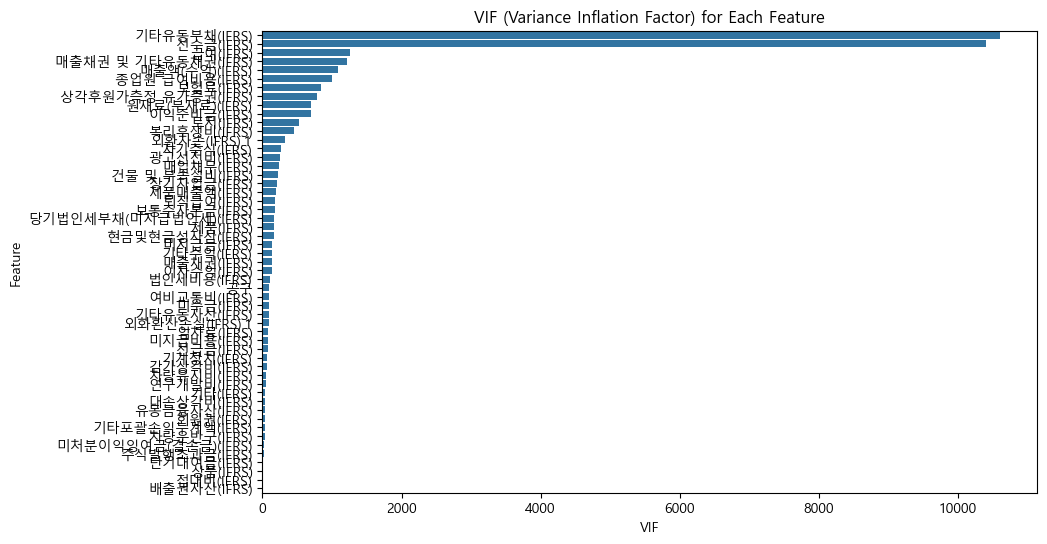

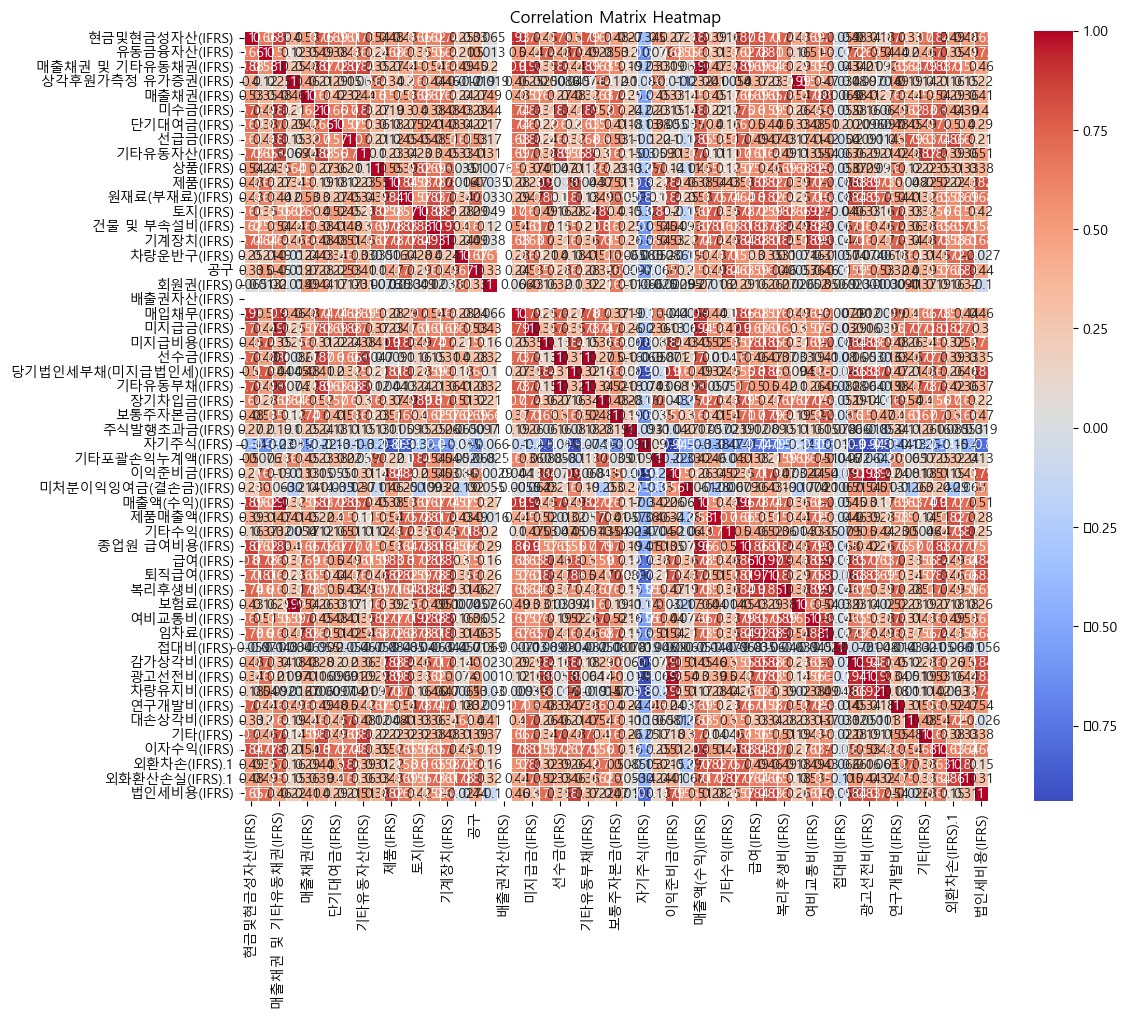

VIF가 가장 높은 변수 제거: 기타유동부채(IFRS)
                  Feature          VIF
0          현금및현금성자산(IFRS)   165.083793
1            유동금융자산(IFRS)    41.961339
2     매출채권 및 기타유동채권(IFRS)  1093.172527
3      상각후원가측정 유가증권(IFRS)   782.956085
4              매출채권(IFRS)   129.353370
5               미수금(IFRS)    90.279195
6             단기대여금(IFRS)    11.136115
7               선급금(IFRS)    74.706857
8            기타유동자산(IFRS)    90.067226
9                상품(IFRS)     8.043287
10               제품(IFRS)   163.939555
11         원재료(부재료)(IFRS)   701.735083
12               토지(IFRS)   497.276574
13        건물 및 부속설비(IFRS)   219.944498
14             기계장치(IFRS)    68.703154
15            차량운반구(IFRS)    30.205194
16                     공구    94.819436
17              회원권(IFRS)    39.771876
18            배출권자산(IFRS)          NaN
19             매입채무(IFRS)   237.801227
20             미지급금(IFRS)   137.009207
21            미지급비용(IFRS)    78.561213
22              선수금(IFRS)   309.359849
23  당기법인세부채(미지급법인세)(IFRS)   165.0

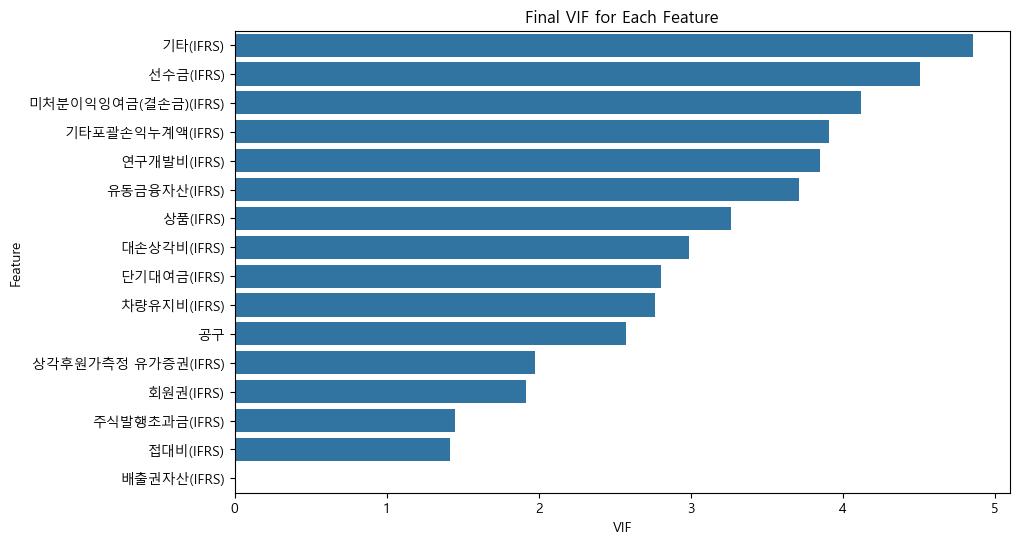

In [11]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

df = X_train.copy()

# VIF 계산 함수
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# 초기 VIF 계산
vif_df = calculate_vif(df)
print(vif_df)

# VIF 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_df.sort_values('VIF', ascending=False))
plt.title('VIF (Variance Inflation Factor) for Each Feature')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.show()

# 상관관계 히트맵
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 다중공선성 문제 해결 예시
while vif_df['VIF'].max() > 5:
    highest_vif = vif_df.sort_values('VIF', ascending=False).iloc[0]['Feature']
    print(f"VIF가 가장 높은 변수 제거: {highest_vif}")
    df = df.drop(columns=[highest_vif])
    vif_df = calculate_vif(df)
    print(vif_df)

# 최종 VIF 출력
print("최종 VIF:")
print(vif_df)

# 최종 VIF 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_df.sort_values('VIF', ascending=False))
plt.title('Final VIF for Each Feature')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.show()


In [13]:
list(vif_df['Feature'])

['유동금융자산(IFRS)',
 '상각후원가측정 유가증권(IFRS)',
 '단기대여금(IFRS)',
 '상품(IFRS)',
 '공구',
 '회원권(IFRS)',
 '배출권자산(IFRS)',
 '선수금(IFRS)',
 '주식발행초과금(IFRS)',
 '기타포괄손익누계액(IFRS)',
 '미처분이익잉여금(결손금)(IFRS)',
 '접대비(IFRS)',
 '차량유지비(IFRS)',
 '연구개발비(IFRS)',
 '대손상각비(IFRS)',
 '기타(IFRS)']

In [17]:
X_train = X_train[['유동금융자산(IFRS)',
 '상각후원가측정 유가증권(IFRS)',
 '단기대여금(IFRS)',
 '상품(IFRS)',
 '공구',
 '회원권(IFRS)',
 '선수금(IFRS)',
 '주식발행초과금(IFRS)',
 '기타포괄손익누계액(IFRS)',
 '미처분이익잉여금(결손금)(IFRS)',
 '접대비(IFRS)',
 '차량유지비(IFRS)',
 '연구개발비(IFRS)',
 '대손상각비(IFRS)',
 '기타(IFRS)']]
X_test = X_test[['유동금융자산(IFRS)',
 '상각후원가측정 유가증권(IFRS)',
 '단기대여금(IFRS)',
 '상품(IFRS)',
 '공구',
 '회원권(IFRS)',
 '선수금(IFRS)',
 '주식발행초과금(IFRS)',
 '기타포괄손익누계액(IFRS)',
 '미처분이익잉여금(결손금)(IFRS)',
 '접대비(IFRS)',
 '차량유지비(IFRS)',
 '연구개발비(IFRS)',
 '대손상각비(IFRS)',
 '기타(IFRS)']]

## 6. 모델링

### 6.1 로지스틱 회귀 분석

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_curve, auc, RocCurveDisplay
)
import matplotlib.pyplot as plt


## 6-2.catboost

In [19]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# CatBoost 모델 생성
model = CatBoostClassifier(iterations=100, learning_rate=0.1, loss_function='Logloss')

# 모델 학습
model.fit(X_train, y_train, verbose=0)

# 테스트 데이터에 대한 예측
y_pred2 = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8547008547008547
Precision: 0.8461538461538461
Recall: 0.9887640449438202
F1 Score: 0.9119170984455959


### 6-3.Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree 모델 생성
model = DecisionTreeClassifier()

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6923076923076923
Precision: 0.7731958762886598
Recall: 0.8426966292134831
F1 Score: 0.8064516129032259


### 6-4.나이브베이즈

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# 기본 나이브 베이즈 분류기 생성
base_model = GaussianNB()

# 배깅 분류기 생성
model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.3162393162393162
Precision: 0.8
Recall: 0.1348314606741573
F1 Score: 0.23076923076923075


In [23]:
df2 = pd.DataFrame()

In [24]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred_train = logit.predict(X_train)
y_pred_test = logit.predict(X_test)

log_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
log_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['logit_train'] = log_train
df2['logit_test'] = log_test

print(confusion_matrix(y_test,y_pred_test))

[[11 17]
 [18 71]]


In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

rf_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
rf_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['rf_train'] = rf_train
df2['rf_test'] = rf_test


print(confusion_matrix(y_test,y_pred_test))

[[12 16]
 [ 0 89]]


In [26]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

xgb_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
xgb_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['xgb_train'] = xgb_train
df2['xgb_test'] = xgb_test


print(confusion_matrix(y_test,y_pred_test))

[[12 16]
 [ 4 85]]


In [27]:
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)
y_pred_train = lgb.predict(X_train)
y_pred_test = lgb.predict(X_test)

lgb_train =[accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
lgb_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['lgb_train'] = lgb_train
df2['lgb_test'] = lgb_test


print(confusion_matrix(y_test,y_pred_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 207, number of negative: 65
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1047
[LightGBM] [Info] Number of data points in the train set: 272, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.761029 -> initscore=1.158332
[LightGBM] [Info] Start training from score 1.158332
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [28]:
cat = CatBoostClassifier(random_state=42, verbose=0)
cat.fit(X_train, y_train)
y_pred_train = cat.predict(X_train)
y_pred_test = cat.predict(X_test)

cat_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
cat_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['cat_train'] = cat_train
df2['cat_test'] = cat_test


print(confusion_matrix(y_test,y_pred_test))

[[14 14]
 [ 1 88]]


In [29]:
svc_clf = SVC() 
svc_clf.fit(X_train,y_train)
y_pred_train = svc_clf.predict(X_train)
y_pred_test = svc_clf.predict(X_test)

svc_clf_train =[accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
svc_clf_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

df2['svm_train'] = svc_clf_train
df2['svm_test'] = svc_clf_test


print(confusion_matrix(y_test,y_pred_test))

[[ 1 27]
 [ 0 89]]


In [30]:
# clf = TabNetClassifier()

# # 모델 훈련
# clf.fit(
#     X_train.values, y_train.values,
#     eval_set=[(X_train.values, y_train.values), (X_test.values, y_test.values)],
#     eval_name=['train', 'test'],
#     eval_metric=['accuracy'],
#     max_epochs=10,
#     patience=10,
#     batch_size=1024, 
#     virtual_batch_size=128,
#     num_workers=0,
#     drop_last=False
# )

In [31]:
# y_pred_train = clf.predict(X_train.values)
# y_pred_test = clf.predict(X_test.values)

# tab_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
# tab_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

# df['tabnet_train'] = tab_train
# df['tabnet_test'] = tab_test


# print(confusion_matrix(y_test,y_pred_test))

In [32]:
# import torch
# import pytorch_tabnet

# print("PyTorch Version:", torch.__version__)
# print("pytorch_tabnet Version:", pytorch_tabnet.__version__)


In [33]:
df2.index = ['accuracy','precision','recall','f1-score','roc-auc']
df2

,logit_train,logit_test,rf_train,rf_test,xgb_train,xgb_test,lgb_train,lgb_test,cat_train,cat_test,svm_train,svm_test
accuracy,0.779412,0.700855,1.0,0.863248,1.0,0.829060,1.0,0.854701,1.0,0.871795,0.779412,0.769231
precision,0.835616,0.806818,1.0,0.847619,1.0,0.841584,1.0,0.860000,1.0,0.862745,0.777358,0.767241
recall,0.884058,0.797753,1.0,1.000000,1.0,0.955056,1.0,0.966292,1.0,0.988764,0.995169,1.000000
f1-score,0.859155,0.802260,1.0,0.917526,1.0,0.894737,1.0,0.910053,1.0,0.921466,0.872881,0.868293
roc-auc,0.665106,0.595305,1.0,0.714286,1.0,0.691814,1.0,0.733146,1.0,0.744382,0.543738,0.517857
